In [1]:
from keras.layers import Dense, Activation
from keras.layers import Conv2D, Input, merge
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.utils import plot_model
from keras.models import Model

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_shape = (41, 41, 1)
input_img = Input(shape=(img_shape))
#01 LAYER
model = Conv2D(64, (3, 3), padding='same', name='conv1')(input_img)
model = Activation('relu', name='act1')(model)

#02 LAYER
model = Conv2D(64, (3, 3), padding='same', name='conv2')(model)
model = Activation('relu', name='act2')(model)

#03 LAYER
model = Conv2D(64, (3, 3), padding='same', name='conv3')(model)
model = Activation('relu', name='act3')(model)

#04 LAYER
model = Conv2D(1, (3, 3), padding='same', name='conv6')(model)
model = Activation('relu', name='act6')(model)

res_img = model
output_img = merge([res_img, input_img])
model = Model(input_img, output_img)

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 41, 41, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 41, 41, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
act1 (Activation)               (None, 41, 41, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 41, 41, 64)   36928       act1[0][0]                       
__________________________________________________________________________________________________
act2 (Acti

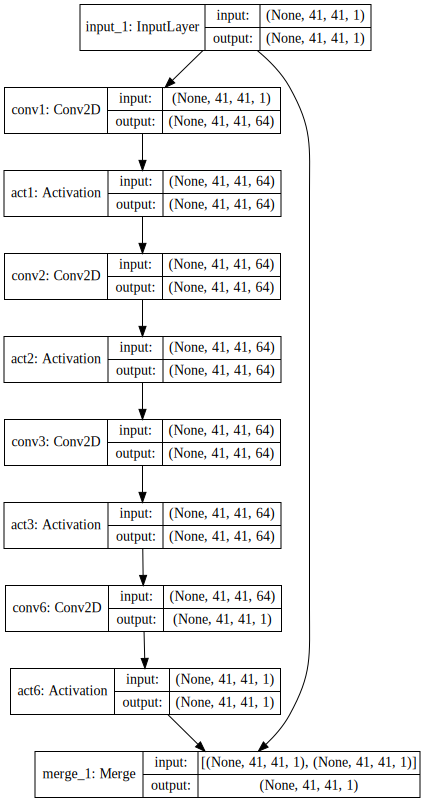

In [4]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
plot_model(model, to_file='MERGELAYER.png')